In [1]:
!pip install tensorflow

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data =pd.read_csv('/content/drive/MyDrive/ANN_DATASet/Churn_Modelling.csv')


In [63]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [64]:
## divide the dataset into independent and dependent feature

X = data.iloc[:,3:13]
y= data.iloc[:,13]

In [65]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [66]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [67]:
# feature engineering
geography = pd.get_dummies(X['Geography'], drop_first=True).astype(int)

gender = pd.get_dummies(X['Gender'], drop_first=True).astype(int)


In [68]:
# concantenate these variables with dataframe
X=X.drop(["Geography","Gender"], axis=1)

In [69]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [70]:
X = pd.concat([X, geography, gender], axis=1)

In [71]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [17]:
# spilting the data  into train and test

from sklearn.model_selection import train_test_split

X_train , X_test ,y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [72]:
## feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train =sc.fit_transform(X_train)
X_test =sc.transform(X_test)

In [73]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [74]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [75]:
X_train.shape

(8000, 11)

In [76]:
X_test.shape

(2000, 11)

In [77]:
# Create The ANN

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU,ReLU
from tensorflow.keras.layers import Dropout


In [79]:
# initialize the ANN

classifier =Sequential()

In [80]:
# add the input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.4))

In [81]:
# adding first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [82]:
# adding second hiiden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [83]:
# adding output layer
classifier.add(Dense(1,activation='sigmoid'))

In [84]:
import tensorflow as tf

opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [87]:
model_history=classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [88]:
from tensorflow import keras

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss",            # Watch validation loss
    min_delta=0,                   # Minimum change to qualify as improvement
    patience=20,                   # Stop after 20 epochs of no improvement
    verbose=1,                     # Print when stopping
    mode="auto",                   # Automatically detect whether to minimize or maximize
    baseline=None,                 # No baseline set
    restore_best_weights=False,   # Keep weights from the final epoch (not best one)
    start_from_epoch=0,           # Start monitoring from the beginning
)


In [89]:
model_history = classifier.fit(
    X_train,
    y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=1000,
    callbacks=[early_stop]
)


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7615 - loss: 0.5431 - val_accuracy: 0.8126 - val_loss: 0.4306
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8028 - loss: 0.4451 - val_accuracy: 0.7986 - val_loss: 0.4198
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8134 - loss: 0.4279 - val_accuracy: 0.8326 - val_loss: 0.3975
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8081 - loss: 0.4308 - val_accuracy: 0.8319 - val_loss: 0.3917
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8287 - loss: 0.4044 - val_accuracy: 0.8292 - val_loss: 0.3918
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8142 - loss: 0.4315 - val_accuracy: 0.8413 - val_loss: 0.3798
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8195 - loss: 0.4218 - val_accuracy: 0.8296 - val_loss: 0.3923
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8315 - loss: 0.3976 - 

In [90]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

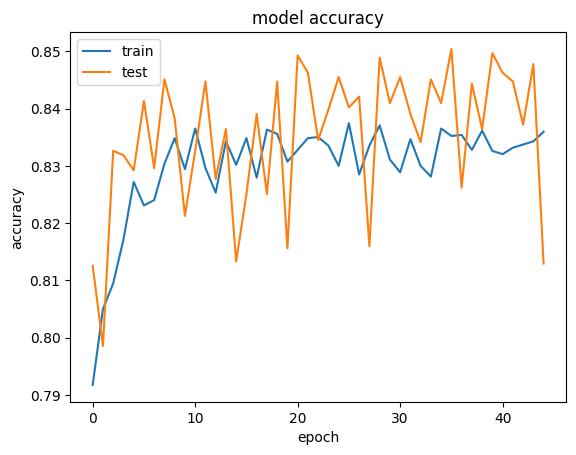

In [91]:
# summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

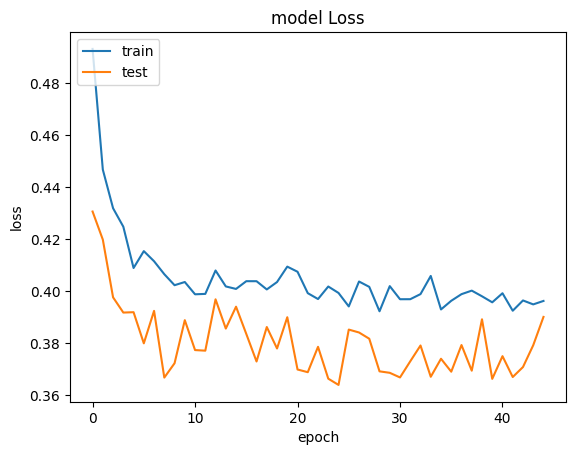

In [92]:
# summarize history for loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [93]:
# predicting the test set results
y_pred =classifier.predict(X_test)
y_pred = (y_pred>=0.5)

y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [94]:
# make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1591,    4],
       [ 356,   49]])

In [95]:
# claculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.82

In [96]:
# get the weights
classifier.get_weights()

[array([[-0.39787748, -0.02862523, -0.02374776,  0.576156  , -0.7021992 ,
         -0.33949894,  0.09358439,  0.0373405 ,  1.6733519 , -0.28205884,
         -0.01242742],
        [ 1.5452696 ,  0.3413295 , -4.005772  , -2.4731033 ,  1.449256  ,
          0.48769253, -3.488666  ,  0.39263803, -2.7263916 , -4.105658  ,
          0.24897285],
        [-0.18509232, -0.08615638, -0.04229645, -0.07880344,  0.7245408 ,
         -0.13218398, -0.6954448 ,  0.06098893,  0.63940597, -0.00787728,
          0.14787759],
        [ 0.02689475,  0.6000737 , -1.173472  , -2.232602  , -1.1023138 ,
         -2.2733452 , -1.3040972 , -2.7909608 , -0.8530139 , -0.72875017,
          0.6900332 ],
        [-0.85220975,  2.9560294 ,  0.62980855,  0.44140548,  0.315849  ,
         -3.0908444 ,  0.56745046, -2.909641  ,  0.5422818 , -0.47572318,
          2.9819405 ],
        [-0.18052068,  0.23047131,  0.48065013, -0.19784443, -0.16040906,
          0.20362727, -0.28810555,  0.04281837,  0.15382384, -0.6772691